## STATISTICS FOR DATA SCIENCE INDIVIDUAL ASSIGNMENT 2

## - By Yannish Bhandari

In [1]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])

import math
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import_or_install('pingouin') # We need this library to have our normality test graph
import pingouin as pg

/opt/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Exercise 1

1. Consider the data census.csv as a whole population, obtain the following statistics for the variables age and **hours_per_week**:

*   Mean
*   Standard deviation


2. Randomly select different sample sizes and show how different proportion selection bias the mean and SD results.

3. Calculate the minimum sample size for a confidence level of 95% and a margin of error of 3%


### 1. Calculate main stats

In [2]:
# First, we are going to import our libraries
import math
import pandas as pd
import numpy as np

In [3]:
path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/' # Where the data is located
df = pd.read_csv(path+'census.csv') # Import the data and store it into an object called "df" (dataframe)
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


We can see that there are several columns with different data types. For example, we have strings (text) such as workclass, education, marital status, etc. therefore, in these cases, we can see categorical data.

In other cases, we have numerical format, like in age, education level (number), hours per week and greater than 50K.

So, we want to have some statistical information on our numerical variables:

In [4]:
df.describe()

,age,education_num,hours_per_week,greater_than_50k
count,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581849,10.080682,40.437469,0.240817
std,13.640593,2.572760,12.347618,0.427586
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


As we can see from the table:
1. Mean age is 38.581849 and the standard deviation for age is 13.640593.
2. Mean hours_per_week is 40.437469 and the standard deviation for hours_per_week is 12.347618.


### 2. Random selection of different sample sizes

Another way to do it:

In [5]:
def select_samples(array, percent):
  print('Number of items selected: ',int(len(array)*percent))
  return np.random.choice(population, size=int(len(array)*percent), replace=False)

def stats(array):
  mean = int(array.mean())
  num = []
  for i in range(0, len(array)):
    num.append((array[i] - mean)**2)
  std = round(math.sqrt((np.array(num)).sum()/(len(array)-1)),2)
  print('Mean =',mean,'SD =',std)

  stats = [mean, std]
  return stats

In [6]:
population = df['age']
s_1 = select_samples(population,0.01)
s_2 = select_samples(population,0.10)
s_3 = select_samples(population,0.70)
s_4 = select_samples(population,0.95)

stats_1 = stats(s_1)
stats_2 = stats(s_2)
stats_3 = stats(s_3)
stats_4 = stats(s_4)

Number of items selected:  325
Number of items selected:  3256
Number of items selected:  22792
Number of items selected:  30932
Mean = 38 SD = 14.22
Mean = 38 SD = 13.64
Mean = 38 SD = 13.64
Mean = 38 SD = 13.64


In [7]:
population = df['hours_per_week']
s_1 = select_samples(population,0.01)
s_2 = select_samples(population,0.10)
s_3 = select_samples(population,0.70)
s_4 = select_samples(population,0.95)

stats_1 = stats(s_1)
stats_2 = stats(s_2)
stats_3 = stats(s_3)
stats_4 = stats(s_4)

Number of items selected:  325
Number of items selected:  3256
Number of items selected:  22792
Number of items selected:  30932
Mean = 39 SD = 11.43
Mean = 40 SD = 12.47
Mean = 40 SD = 12.35
Mean = 40 SD = 12.38


Based on the outputs generated for different sample sizes, it is evident that as sample size increases, the mean and standard deviation (SD) values are more stable, reducing variability seen in smaller samples. Large samples result in more consistent means and SDs, which shows a lower effect of selection bias. This further tells us about the importance of using larger sample sizes to achieve reliable and consistent statistical measures that accurately reflect the overall population.

### 3. Sample size calculation

Calculate the sample size needed for a confidence level of 95% and an error of 3%.

First, we are going to calculate n, which is the sample size needed in the case we have no idea of the population size:

In [8]:
CL = 0.95 # Confidence level
p = 0.5 # expected prevalence, 50% if unkown
e = 0.03 # error
N = len(df)

alpha_half = (1-CL)/2 # Calculate alpha/2
Z_score = st.norm.ppf(alpha_half+CL) # Get the Z value (tables) for the specified alpha
n = ((Z_score**2)*p*(1-p))/e**2 # Calculate the value of n (look at the formula in the slides)

print(f"The sample size needed for a confidence level of {CL*100}%, an error of {e*100}% and supposing that we don't know the population size is: {round(n,0)}")

The sample size needed for a confidence level of 95.0%, an error of 3.0% and supposing that we don't know the population size is: 1067.0


Now, we are going to adapt the formula in the case we know the population size:

In [9]:
sample_size = n/(1+(((Z_score**2)*p*(1-p))/((e**2)*N)))

print(f"The sample size needed for a confidence level of {CL*100}%, an error of {e*100}% and for a population size of {N} is: {round(sample_size,0)}")

The sample size needed for a confidence level of 95.0%, an error of 3.0% and for a population size of 32560 is: 1033.0


We can create a function:

In [10]:
def sample_calculator(N,CL,p,e):
  alpha_half = (1-CL)/2
  Z_score = st.norm.ppf(alpha_half+CL)
  n = ((Z_score**2)*p*(1-p))/e**2

  try:
    if N == '?': # In the case we don't know the population size
      print('sample size for unknown population size:')
      return round(n,0)
    else:
      sample_size = n/(1+(((Z_score**2)*p*(1-p))/((e**2)*N)))
      print('sample size for known population size:')
      return round(sample_size,0)
  except:
    print('Error: check your arguments')

In [11]:
sample_calculator(len(df),0.95,0.5,0.03)

sample size for known population size:


1033.0

## Exercise 2


Consider the data census.csv and obtain the following statistics:

a.	Hours of work per week by gender: min, max, mean and SD

b.	Histograms: one histogram per gender and another histogram combining both.

c.	Test for normality:

i.	KS, Shapiro-Wilk, Jarque-Bera, Normaltest

ii.	Normality test Graph

d. Test if men and women work different hours

First, import the dataset:

In [12]:
df= pd.read_csv(path+'census.csv')
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


### a. hours per week by gender

We are going to create different datasets for both men and women (in this case, to help us organize our data)

In [13]:
df['gender'].unique() #to know the different values that we have in the dataset

array([' Male', ' Female'], dtype=object)

In [14]:
df_women = df[df['gender'] == ' Female'] # select only the women
df_women.describe()

,age,education_num,hours_per_week,greater_than_50k
count,10770.000000,10770.000000,10770.000000,10770.000000
mean,36.858682,10.035747,36.410028,0.109471
std,14.014270,2.380065,11.811797,0.312243
min,17.000000,1.000000,1.000000,0.000000
25%,25.000000,9.000000,30.000000,0.000000
50%,35.000000,10.000000,40.000000,0.000000
75%,46.000000,12.000000,40.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


In [15]:
df_men = df[df['gender'] == ' Male'] # Select only the men
df_men.describe()

,age,education_num,hours_per_week,greater_than_50k
count,21790.000000,21790.000000,21790.000000,21790.000000
mean,39.433547,10.102891,42.428086,0.305737
std,13.370630,2.662630,12.119755,0.460729
min,17.000000,1.000000,1.000000,0.000000
25%,29.000000,9.000000,40.000000,0.000000
50%,38.000000,10.000000,40.000000,0.000000
75%,48.000000,13.000000,49.000000,1.000000
max,90.000000,16.000000,99.000000,1.000000


In [16]:
# We can create a function, so it's easier to get the stats (we also got them with the .describe method)
def print_stats(df,variable):
  print('Min:',df[variable].min())
  print('Max:',df[variable].max())
  print('Mean:',df[variable].mean())
  print('SD:',df[variable].std())


print_stats(df_women,'hours_per_week')
print_stats(df_men,'hours_per_week')

Min: 1
Max: 99
Mean: 36.4100278551532
SD: 11.811797273595987
Min: 1
Max: 99
Mean: 42.42808627810923
SD: 12.119755243874367


Hours per week for women:
1. Min - 1
2. Max - 99
3. Mean - 36.41
4. SD - 11.81

Hours per week for men:
1. Min - 1
2. Max - 99
3. Mean - 42.43
4. 12.12

### b. Draw the histograms

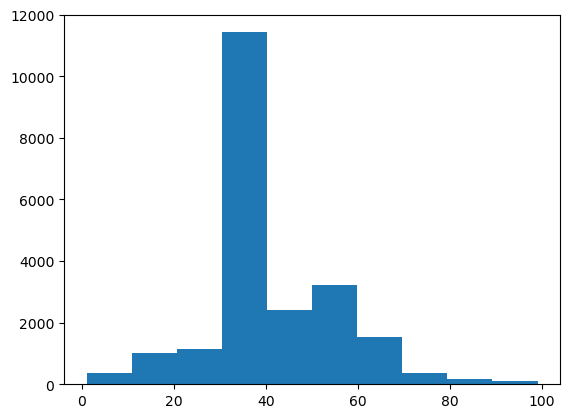

In [17]:
# Make a histogram for all men and the variable hours per week

plt.show(plt.hist(df_men['hours_per_week']))

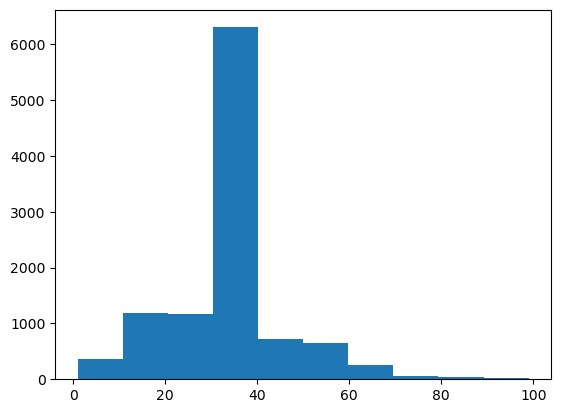

In [18]:
# Make a histogram for all women and the variable hours per week

plt.show(plt.hist(df_women['hours_per_week']))

Create a loop to draw the histograms

In [19]:
gender_list = [' Male',' Female'] # List with the gender values
gender_list

[' Male', ' Female']

This is the same as:

In [20]:
gender_list = df.gender.unique().tolist()
gender_list

[' Male', ' Female']

In [21]:
gender_list[0] # show me the first value of the gender list

' Male'

In [22]:
gender_list[1] # show me the second value of the gender list

' Female'

In [23]:
df[(df['gender'] == gender_list[0])] # show me the table where the value gender is equal to the first value of the gender list:

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32552,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,0
32553,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
32554,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1


In [24]:
df[(df['gender'] == gender_list[1])] # show me the table where the value gender is equal to the second value of the gender list:

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
12,23,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32545,37,Private,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,0
32548,43,State-gov,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,40,United-States,0
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0


In [25]:
df['hours_per_week'][(df['gender'] == gender_list[1])] # select the column hours per week, where the value gender is equal to the first value of the gender list

4        40
5        40
6        16
8        50
12       30
         ..
32545    40
32548    40
32555    38
32557    40
32559    40
Name: hours_per_week, Length: 10770, dtype: int64

 Male
Mean 42.42808627810923
SD 12.119755243874367


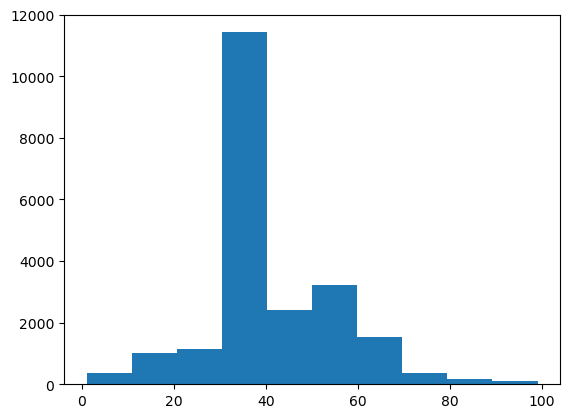

 Female
Mean 36.4100278551532
SD 11.811797273595987


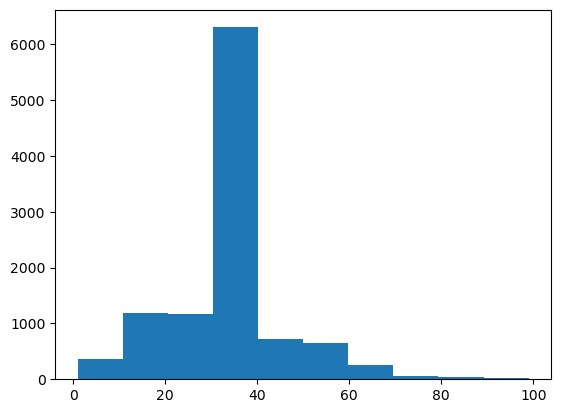

In [26]:
i = 0
for gender in gender_list:
  print(gender_list[i])
  print('Mean',df['hours_per_week'][(df['gender'] == gender_list[i])].mean())
  print('SD',df['hours_per_week'][(df['gender'] == gender_list[i])].std())
  plt.show(plt.hist(df['hours_per_week'][(df['gender'] == gender_list[i])])) # plot the values where the gender is equal to either Male or Female
  i += 1

Observations:

1. Histogram for males and hours per week:
  - The distribution of hours worked per week for males shows a peak around the 40-hour mark.
  - The mean number of hours worked by males is approximately 42.4 hours with a standard deviation of 12.1 hours.
  - There are fewer males working more than 40 hours per week than less than 40 hours per week.

2. Histogram for females and hours per week:
  - The distribution of hours worked per week for females also peaks around the 40-hour mark but is a lot more concentrated compared to males.
  - The mean number of hours worked by females is approximately 36.4 hours with a standard deviation of 11.8 hours.
  - The distribution indicates that females are more likely to work slightly fewer hours than males.

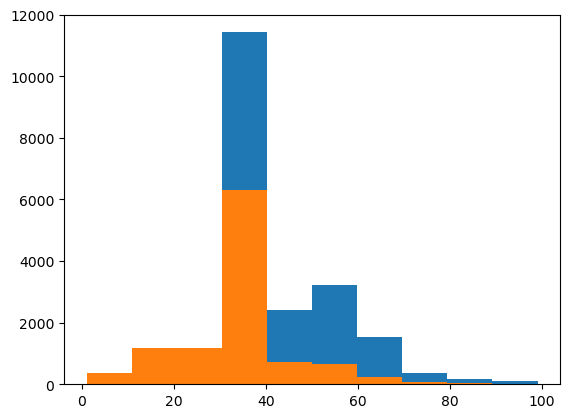

In [27]:
# Plot both distributions in the same graph:

plt.hist(df['hours_per_week'][(df['gender'] == gender_list[0])])
plt.hist(df['hours_per_week'][(df['gender'] == gender_list[1])])
plt.show()

Observations:

Combined histogram of males and females:
  - When combined, the histogram clearly shows that both males and females predominantly work around 40 hours per week, but males have a broader spread of hours worked.
  - The overlay of histograms indicates that males are more likely to work longer hours compared to females.
  - This combined view highlights the gender-based differences in work hours, with males having a higher average and greater variability in hours worked per week compared to females.

### c. Normality tests

In [28]:
df_men['hours_per_week'].dropna().mean() == df_men['hours_per_week'].mean() # To check if the null values can affect the stats

True

In [29]:
df_men['hours_per_week'].dropna().std() == df_men['hours_per_week'].std()

True

**KS test:**

In [30]:
# Get the p-value.
# Our null hypothesis in this test, is that the data is normally distributed
st.kstest(df_men['hours_per_week'],'norm').pvalue

0.0

In this case, out p-value is 0, therefore, we reject the null hypothesis. This means that we can assume that the data does not follow a normal distribution

In [31]:
st.kstest(df_women['hours_per_week'],'norm').pvalue

0.0

Another p-value equal to 0 for the female data. Therefore, none of them follow a normal distribution by applying th KS test.

**Shapiro-Wilk** test

In [32]:
data = df_men['hours_per_week']
print(st.shapiro(data).pvalue)

0.0


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
data = df_women['hours_per_week']
print(st.shapiro(data).pvalue)

0.0


Nor women, nor men follow a normal distribution according to the Shapiro-Wilk test.

**Jarque-Bera** test

In [34]:
data = df_men['hours_per_week']
print('p-value men',st.jarque_bera(data).pvalue)

data = df_men['hours_per_week']
print('p-value women',st.jarque_bera(data).pvalue)

p-value men 0.0
p-value women 0.0


None of them follow a normal distribution according to the Jarque-Bera test

In [35]:
# Now, we can put all the test in one cell:

data = df_men['hours_per_week']
print('Normality tests for men')
print(st.kstest(data,'norm').pvalue)
print(st.shapiro(data).pvalue)
print(st.jarque_bera(data).pvalue)
print(st.normaltest(data).pvalue)


data = df_women['hours_per_week']
print('Normality tests for women')
print(st.kstest(data,'norm').pvalue)
print(st.shapiro(data).pvalue)
print(st.jarque_bera(data).pvalue)
print(st.normaltest(data).pvalue)

Normality tests for men
0.0
0.0
0.0
0.0
Normality tests for women
0.0
0.0
0.0
1.7216393222120376e-138


Conclusion: The results of multiple normality tests (KS, Shapiro-Wilk, Jarque-Bera) for both men and women show p-values of 0.0 or extremely close to 0.

**Graph for normality tests**

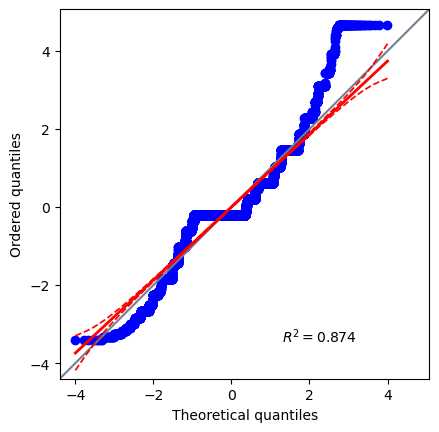

In [36]:
# Normality test graph for men
plt.show(pg.qqplot(df_men['hours_per_week'], dist='norm', confidence=.95))

Conclusion: The Q-Q plot for men's hours per week shows significant deviations from the theoretical normal line, particularly at the tails, indicating non-normality and supporting the earlier statistical test results.

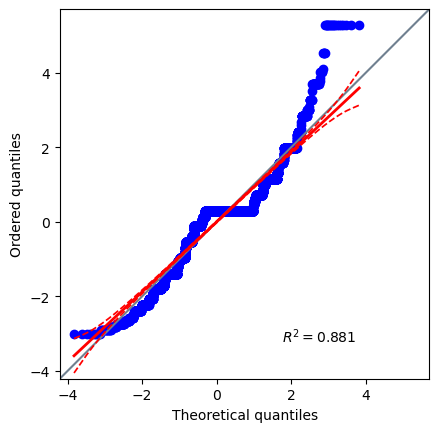

In [37]:
# Normality test graph for women
plt.show(pg.qqplot(df_women['hours_per_week'], dist='norm', confidence=.95))

Conclusion: The Q-Q plot for women's hours per week shows noticeable deviations from the normal distribution line, particularly at the tails, indicating non-normality and corroborating the statistical test results.

### d. Test if men and women work different hours a week

Now, we know that none of them follow a Normal distribution, therefore, we are going to propose hypothesis testing based on that.


For the T-test, the samples do not have to be normally distributed, given a sufficient sample size. In the t-test, our parameter of interest is the mean. According to the Central Limit Theorem, when repeatedly sampling from a population of any shape, if the sample size if sufficient, the sampling means will resemble the normal distribution.


To perform the T-test, we have to know if both samples have the same variances. Therefore, we are going to perform an F test:

In [38]:
# We are going to calculate the F statistic for both groups:

group_1 = df_men['hours_per_week']
group_2 = df_women['hours_per_week']

F = group_1.var()/group_2.var() # Variance of group 1 / variance of group 2
F

1.0528238867420685

Now, we need to calculate the cumulative distribution function (CDF, the area under the curve) for an F value of 1.05 and n-1 degrees of freedom:

In [39]:
CDF = st.f.cdf(F, len(group_1)-1, len(group_2)-1)
CDF

0.9989616378304318

Therefore, our p-value is:

In [40]:
1 - CDF

0.0010383621695682077

Another way to directly calculate our p-value:

In [41]:
st.f.sf(F, len(group_1)-1, len(group_2)-1)

0.0010383621695672339

Our p-value is very low, therefore, we can not consider that our variances are equal for men and women.

We can create a function to get the p-value for an F test:

In [42]:
def f_test(group1, group2):
   F = group_1.var()/group_2.var()
   p_value = 1-st.f.cdf(F, len(group1)-1, len(group2)-1)
   return print(f'F-test p-value: {round(p_value,4)}')


f_test(group_1, group_2)

F-test p-value: 0.001


Now, we can perform our t-test to see if the means are statistically different:

In [43]:
group_1 = df_men['hours_per_week']
group_2 = df_women['hours_per_week']

st.ttest_ind(group_1, group_2, equal_var=False)

TtestResult(statistic=42.88182763855399, pvalue=0.0, df=21954.614569291927)

In [44]:
st.ttest_ind(group_1, group_2, equal_var=False).pvalue

0.0

Conclusion: We can see that our p-value is zero, therefore, we reject the null hypothesis. Which means that there is a statistically significant difference in the hours worked per week between men and women.

## Exercise 3

Test if men or women differ in central tendency for the variable education_num

a. Histograms:one histogram per gender and another histogram combining both.

b. Calculate the contingency table for the median and test for difference in central tendency.

c. Create two piecharts showing the proportions of males with doctorate degrees and women with doctorate degrees. These graphs should not be biased.

d. Create two piecharts as the previous, but instead of Doctorate degrees, include the proportion of males and females earning more and less than 50k a year:

i. Males that earn more 

ii. Males that earn less

iii. Females that earn more

iv. Females that earn less

e. Create two piecharts that compares the proportion of doctors and no doctors earning more than 50k:

i. Doctors that earn more

ii. Doctors that earn less

iii. No doctors that earn more

iv. No doctors that earn less

### Get central tendecy stats (Mean and SD) for education num and Histograms

In [45]:
df= pd.read_csv(path+'census.csv')
gender = [' Male',' Female']

x = df[['education_num']][(df['gender'] == gender[0])] # Here, the gender value is Male, is the first on the list
y = df[['education_num']][(df['gender'] == gender[1])] # Women

df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


### a. Histograms

 Male
Mean 10.102891234511244
SD 2.662569382387412


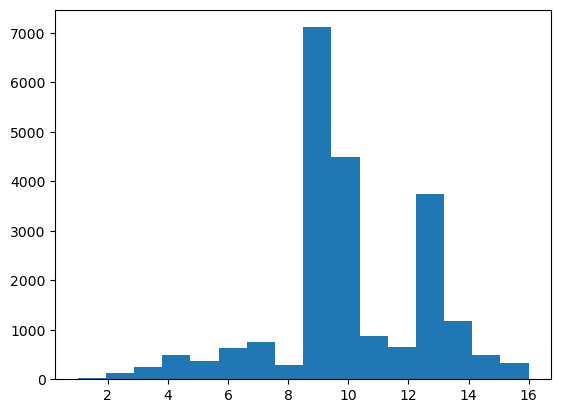

 Female
Mean 10.035747446610957
SD 2.379954144534859


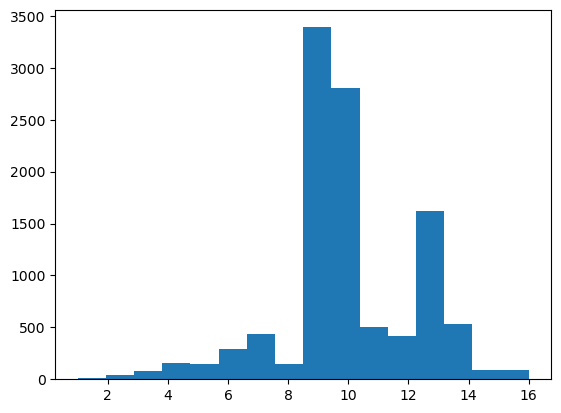

In [46]:
lst = [x,y]
i = 0

for data in lst:
  print(gender[i])
  print('Mean',np.array(data).mean())
  print('SD',np.array(data).std())
  plt.show(plt.hist(data,len(df['education_num'].unique())))
  i += 1

Observations:

1. Histogram for females and education_num:
  - The histogram for females shows a primary peak around 10 years of education and a secondary peak around 13 years.
  - The distribution is slightly skewed to the right, with fewer females having less than 8 years or more than 14 years of education.
  - The mean education level for females is approximately 10 years, with a standard deviation of about 2.38 years, indicating moderate variability.

2. Histogram for males and education_num:
  - The histogram for males also shows a primary peak around 10 years of education, similar to females, but with a higher secondary peak around 13-14 years.
  - The distribution is slightly more spread out than for females, with noticeable numbers of males across the entire range of education years.
  - The mean education level for males is slightly higher at around 10.1 years, with a standard deviation of about 2.66 years, indicating a slightly higher variability compared to females.

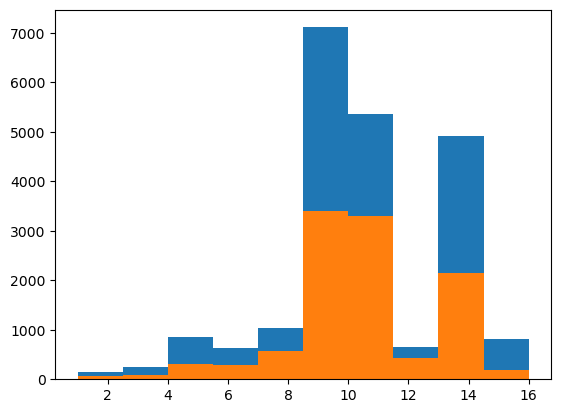

In [47]:
plt.hist(x,10)
plt.hist(y,10)
plt.show()

Observations:

Combined histogram of males and females:
  - The combined histogram shows the distribution of the education_num variable for both males and females.
  - Both genders exhibit a bimodal distribution with peaks around 9-10 years and 13-14 years of education.
  - There are more males than females with higher years of education, as indicated by the larger blue bars in the higher bins.

In [48]:
print(f'Number of males: {x.count()}')
print(f'Number of females: {y.count()}')

Number of males: education_num    21790
dtype: int64
Number of females: education_num    10770
dtype: int64


### b. Contingency tables for median values

In [49]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [50]:
x = df['education_num'][(df['gender'] == ' Male')]
y = df['education_num'][(df['gender'] == ' Female')]

median = df.education_num.median()
print(median)




10.0


show us the number of men and women who are above and below the population median

In [51]:
print(f"N of items above the median for males: {len([i for i in x if i > median])}")
print(f"N of items below or equal to the median for males: {len([i for i in x if i <= median])}")

print(f"N of items above the median for females: {len([i for i in y if i > median])}")
print(f"N of items below or equal to the median for females: {len([i for i in y if i <= median])}")

N of items above the median for males: 7262
N of items below or equal to the median for males: 14528
N of items above the median for females: 3254
N of items below or equal to the median for females: 7516


Conclusion: 

A larger proportion of males have education years above the median compared to females. This suggests that males tend to have slightly higher education levels than females. However, a larger proportion of males also have education years below or equal to the median compared to the females. Testing for the difference in central tendency would likely confirm that this observed disparity is statistically significant.

print the contingency table in other format:


In [52]:
st.median_test(x, y).table

array([[ 7262,  3254],
       [14528,  7516]])

In [53]:
cont_table = st.median_test(x, y).table # save our contingency table
cont_table

array([[ 7262,  3254],
       [14528,  7516]])

In [54]:
st.chi2_contingency(cont_table) # Apply the Chi2 test

Chi2ContingencyResult(statistic=31.81418870097841, pvalue=1.6964889118656903e-08, dof=1, expected_freq=array([[ 7037.58108108,  3478.41891892],
       [14752.41891892,  7291.58108108]]))

In [55]:
st.chi2_contingency(cont_table).expected_freq # If we want to see the expected value to compare to the observed one (contingency table)

array([[ 7037.58108108,  3478.41891892],
       [14752.41891892,  7291.58108108]])

In [56]:
st.chi2_contingency(cont_table).pvalue # To get our p-value

1.6964889118656903e-08

Our p-value result is very low, close to zero. Therefore, we reject our null hypothesis. We can not assume that both males and females have the same proportions based on education level.

### c. Pie charts male doctor and female doctor

In [57]:
df['education'].unique() # Show us the different values of education levels

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Show us how many men and women are PhD holders

In [58]:
print(len(df[(df['gender'] == ' Female') & (df['education'] == ' Doctorate')]))
print(len(df[(df['gender'] == ' Female') & (df['education'] != ' Doctorate')]))

print(len(df[(df['gender'] == ' Male') & (df['education'] == ' Doctorate')]))
print(len(df[(df['gender'] == ' Male') & (df['education'] != ' Doctorate')]))


86
10684
327
21463


Simple pie chart

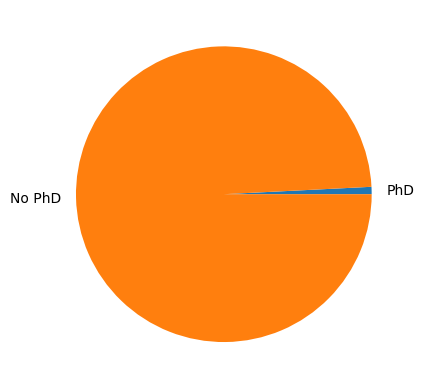

In [59]:
# Women
fig, ax = plt.subplots()
# plot the values 86 and 10684, which are how many women hold PhD and how many don't
ax.pie([86, 10684], labels=['PhD', 'No PhD'])
plt.show()

Adding labels and notation

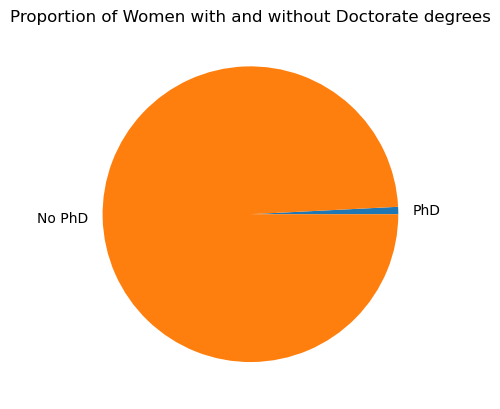

In [60]:
fig, ax = plt.subplots()
ax.pie([86, 10684], labels=['PhD', 'No PhD'])
plt.title(f'Proportion of Women with and without Doctorate degrees')

plt.show()

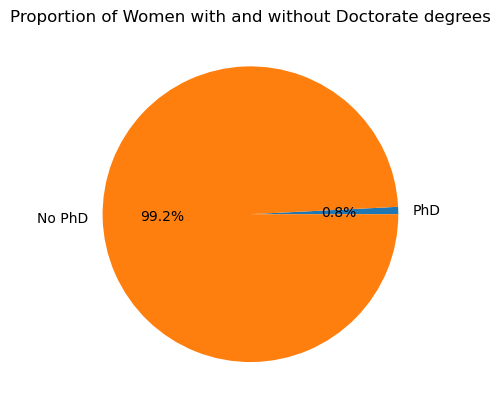

In [61]:
fig, ax = plt.subplots()
ax.pie([86, 10684], labels=['PhD', 'No PhD'], autopct='%1.1f%%') # Add percent
plt.title(f'Proportion of Women with and without Doctorate degrees')

plt.show()

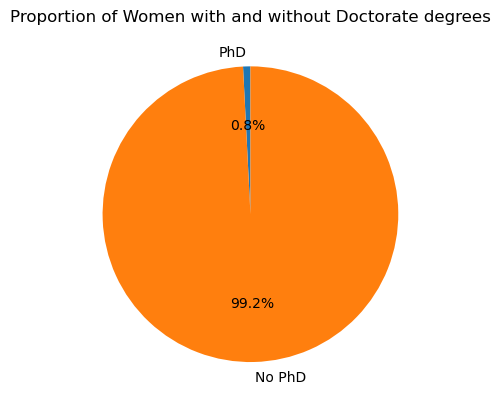

In [62]:
fig, ax = plt.subplots()
ax.pie([86, 10684], labels=['PhD', 'No PhD'], autopct='%1.1f%%', startangle=90) # Put first slice in a 90º angle
plt.title(f'Proportion of Women with and without Doctorate degrees')

plt.show()

Now, more automatic calculation and loop:

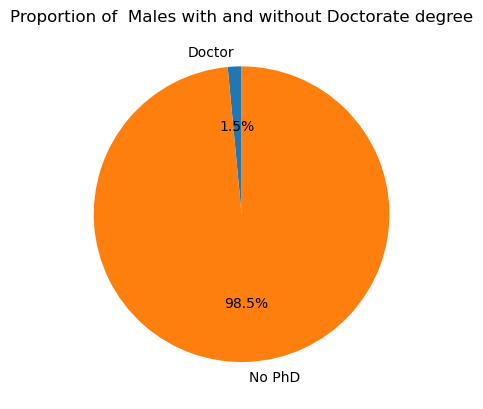

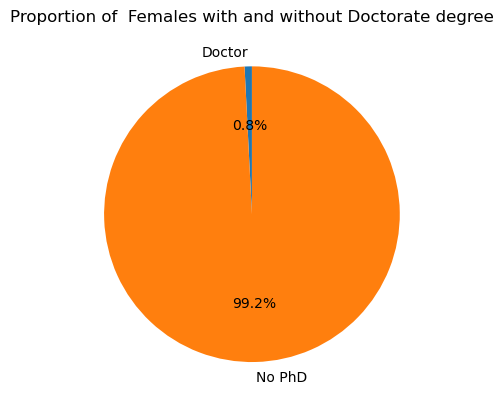

In [63]:
import matplotlib.pyplot as plt


for gender in [' Male',' Female']:
  labels = 'Doctor', 'No PhD'
  sizes = [len(df[(df['gender'] == gender) & (df['education'] == ' Doctorate')]),
           len(df[(df['gender'] == gender) & (df['education'] != ' Doctorate')])]

  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

  plt.title(f'Proportion of {gender}s with and without Doctorate degree')
  plt.show()


Conclusion:

1. Males with and without doctorate degrees: The graph indicates a small minority of males (1.5%) have a Doctorate degree, while the majority (98.5%) do not.

2. Females with and without doctorate degrees: The graph shows us an overwhelming majortiy of females (99.2%) do not have a Doctorate degree, with only 0.8% having achieved this level of education.

Therefore, overall more men have doctorate degrees than women.

### d. Piecharts male and female earning more than 50K a year

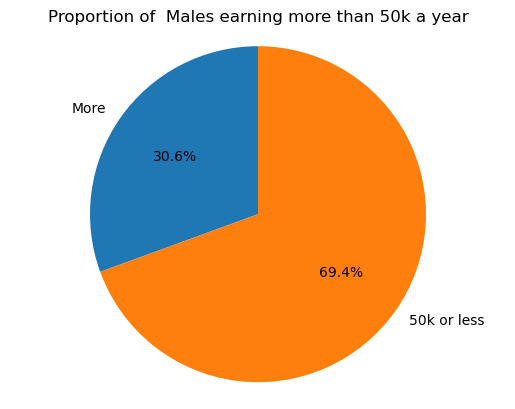

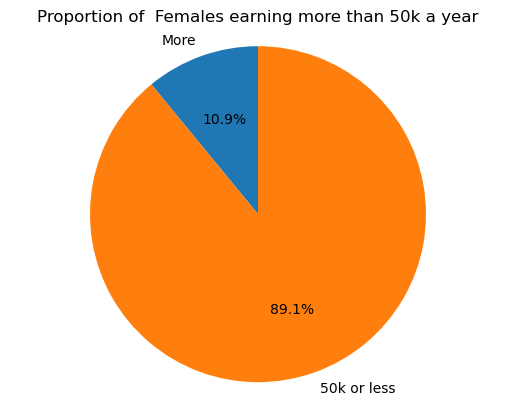

In [64]:
for gender in [' Male',' Female']:
  labels = 'More', '50k or less'
  sizes = [len(df[(df['gender'] == gender) & (df['greater_than_50k'] == 1)]),
         len(df[(df['gender'] == gender) & (df['greater_than_50k'] != 1)])]

  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  plt.title(f'Proportion of {gender}s earning more than 50k a year')
  plt.show()

Conclusion:

1. Males earning more than 50k a year: The first graph reveals that a significant majority of males (69.4%) earn $50k or less annually, with only 30.6% earning more than $50k.

2. Females earning more than 50k a year: A small percentage (10.9%) of females earn more than 50k per year, while a large majority, 89.1%, earn 50k or less.

Therefore, overall women earning 50k or more are fewer than men earning 50k or more.

### e. Piecharts doctor and no doctor earning more than 50K a year

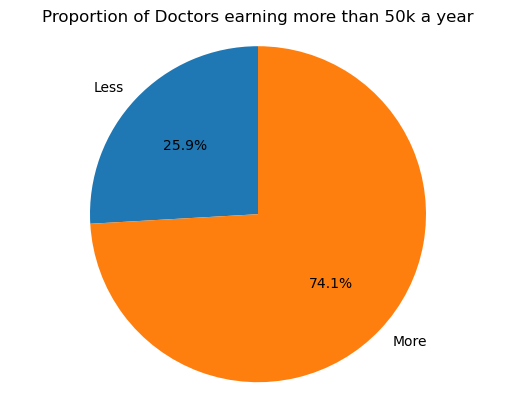

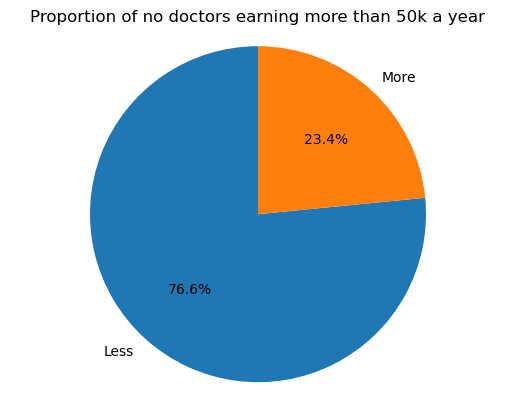

In [65]:
labels = 'Less', 'More'
sizes = [len(df[(df['education'] == ' Doctorate') & (df['greater_than_50k'] == 0)]),
        len(df[(df['education'] == ' Doctorate') & (df['greater_than_50k'] != 0)])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Proportion of Doctors earning more than 50k a year')
plt.show()



labels = 'Less', 'More'
sizes = [len(df[(df['education'] != ' Doctorate') & (df['greater_than_50k'] == 0)]),
        len(df[(df['education'] != ' Doctorate') & (df['greater_than_50k'] != 0)])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Proportion of no doctors earning more than 50k a year')
plt.show()

Conclusion:

1. Doctors earning more or less than 50k a year: A significant majority (74.1%) of doctors earn more than 50k per year, whereas only 25.9% earn less than 50k.

2. Non doctors earning more or less than 50k a year: Only 23.4% of non-doctors earn more than 50k per year, while the majority (76.6%) earn less than 50k.

Therefore, overall more people with doctorate degrees earn 50k or more than people without doctorate degrees.